### Do your imports!

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [283]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)
df = pd.read_csv("subset.csv", nrows=1000000)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [284]:
df.head(30)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
5,41694425,02/13/2019 12:44:06 AM,02/13/2019 09:16:20 PM,HPD,Department of Housing Preservation and Development,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11219,1238 50 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
6,41694426,01/31/2019 08:31:53 PM,02/13/2019 02:48:55 PM,HPD,Department of Housing Preservation and Development,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10040,9 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
7,41694430,02/13/2019 10:31:12 AM,02/21/2019 02:16:41 PM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11420,109-40 128 STREET,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,PHONE
8,41694431,01/27/2019 09:24:14 PM,02/13/2019 01:45:47 PM,HPD,Department of Housing Preservation and Development,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11225,827 NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
9,41694432,02/13/2019 12:37:00 PM,02/14/2019 12:00:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [285]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,43862363,09/22/2019 11:30:00 AM,09/28/2019 12:00:00 PM,DSNY,BCC - Queens East,Missed Collection (All Materials),2 Bulk-Missed Collection,Sidewalk,11357.0,166-56 20 AVENUE,ADDRESS,Whitestone,Closed,QUEENS,PHONE
999996,43862364,09/22/2019 11:50:00 AM,09/26/2019 12:00:00 PM,DSNY,BCC - Staten Island,Missed Collection (All Materials),2R Bulk-Missed Recy Collection,Sidewalk,10309.0,139 GLADWIN STREET,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,ONLINE
999997,43862376,09/22/2019 11:41:00 AM,09/25/2019 12:00:00 PM,DSNY,BCC - Brooklyn South,Missed Collection (All Materials),2 Bulk-Missed Collection,Sidewalk,11219.0,1550 43 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
999998,43862397,09/22/2019 08:15:00 PM,09/26/2019 04:15:00 PM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,PETERS FIELD,BLOCKFACE,NaN,Closed,QUEENS,UNKNOWN


# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [310]:
#date columns are objects, not dates 
df.dtypes

unique_key                          int64
created_date               datetime64[ns]
closed_date                datetime64[ns]
agency                             object
agency_name                        object
complaint_type                     object
descriptor                         object
location_type                      object
incident_zip                       object
incident_address                   object
address_type                       object
city                               object
status                             object
borough                            object
open_data_channel_type             object
month                              object
time_to_fix               timedelta64[ns]
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [286]:
df['created_date'] = pd.to_datetime(df['created_date'], format="%m/%d/%Y %I:%M:%S %p")
df['closed_date'] = pd.to_datetime(df['closed_date'], format="%m/%d/%Y %I:%M:%S %p")

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [287]:
#march has the most 311 calls 
df['month'] = df['created_date'].dt.strftime("%b")
df['month'].value_counts()

May    217373
Mar    202725
Apr    194527
Jun    135362
Feb    108807
Aug     52993
Sep     36811
Jul     18373
Jan     15925
Dec      7723
Nov      5096
Oct      4285
Name: month, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [94]:
#Sep2019
df['month_year'] = df['created_date'].dt.strftime("%b%Y")
df['month_year'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Jan2019
1         Jan2019
2         Feb2019
3         Feb2019
4         Feb2019
           ...   
999995    Sep2019
999996    Sep2019
999997    Sep2019
999998    Sep2019
999999    Sep2019
Name: month_year, Length: 1000000, dtype: object>

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

<AxesSubplot:xlabel='created_date'>

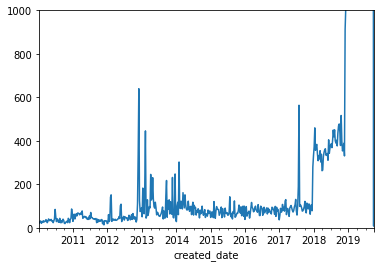

In [97]:
df.resample('W', on='created_date').size().plot(ylim=(0,1000))

## What time of day (by hour) is the most least for 311 complains? The most common?


In [101]:
#04 AM has the last complaints and 10 AM has the most 
df['hour'] = df['created_date'].dt.strftime("%H")
df['hour'].value_counts()

10    72823
11    71500
09    69377
12    66077
14    64919
13    62437
15    61023
16    54615
08    51184
17    46215
18    42707
21    42292
22    41916
19    41075
20    41063
23    35658
00    33834
07    29784
01    18409
06    17038
02    11190
05     9042
03     8415
04     7407
Name: hour, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:>

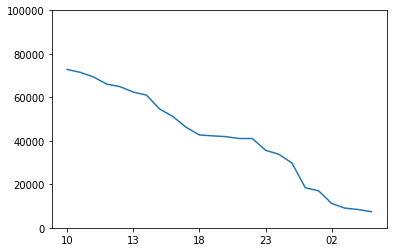

In [111]:
df['hour'].value_counts().plot(ylim=(0,100000))

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [113]:
#NYPD filed the most complaints 
df.agency.value_counts()

NYPD     261669
HPD      217064
DSNY     158866
DOT      124911
DOB      111584
DEP       88316
DPR       13343
DOHMH     10581
DCA        4230
TLC        3053
DOF        2370
DFTA       2286
DHS         482
DOE         330
DCAS        280
DOITT       151
EDC         148
DVS         120
ACS         117
TAX          86
DCP           9
COIB          4
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [ ]:
# NYPD: New York Police Department 
# HPD: Department of Housing Preservation and Development 
# DOT: Department of Transportation 
# DSNY: Department of Sanitation
# DEP: Department of Environmental Protection

## What is the most common complaint to HPD?

In [118]:
#HEAT/HOT WATER
HPD = df[df.agency.str.contains("HPD", case=False, na=False)]
HPD.complaint_type.value_counts()

HEAT/HOT WATER          64948
UNSANITARY CONDITION    34737
PAINT/PLASTER           22921
PLUMBING                21782
DOOR/WINDOW             15316
WATER LEAK              14558
GENERAL                 11225
ELECTRIC                10185
FLOORING/STAIRS          9877
APPLIANCE                5846
SAFETY                   4569
ELEVATOR                  689
OUTSIDE BUILDING          411
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [152]:
df.groupby(by='agency').complaint_type.value_counts().head()


agency  complaint_type    
ACS     Forms                  117
COIB    Forms                    4
DCA     Consumer Complaint    4230
DCAS    Question               261
        Comments                19
Name: complaint_type, dtype: int64

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [158]:
#Loud Music/Party is the most common kind of residentail noise complaint 
noice = df[df.complaint_type.str.contains("noise - Residential", case=False, na=False)]
noice.descriptor.value_counts()

Loud Music/Party    47657
Banging/Pounding    21345
Loud Talking         5302
Loud Television      1524
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

<AxesSubplot:>

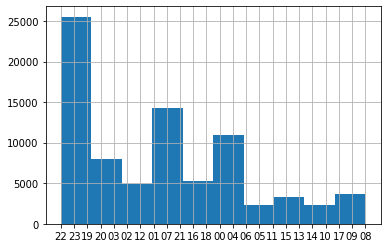

In [167]:
#most loud music complaints come in at around 22-23 hour 
loud_music = df[df.descriptor.str.contains("Loud Music/Party", case=False, na=False)]
loud_music.hour.hist()

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

<AxesSubplot:xlabel='month_year2'>

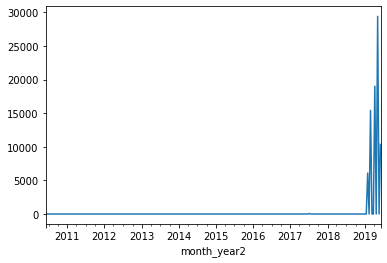

In [263]:
#
loud_music.resample('2W', on='month_year2').size().plot()



## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [288]:
bees = df[df.complaint_type.str.contains("bee", case=False, na=False)]
bees

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE,Mar
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE,Mar
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,Apr
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,Apr
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE,Apr
466469,42291921,2019-04-23 11:39:59,2019-05-06 09:36:28,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11210,674 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,Apr
472431,42300656,2019-04-23 14:56:21,2019-05-06 09:37:30,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10037,2311 5 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,Apr
506112,42497797,2019-04-28 15:33:33,2019-05-13 11:10:45,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11385,2017 HARMAN STREET,ADDRESS,RIDGEWOOD,Closed,QUEENS,ONLINE,Apr
532844,42533095,2019-05-02 13:13:47,2019-05-13 11:10:47,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11419,107-14 125 STREET,ADDRESS,SOUTH RICHMOND HILL,Closed,QUEENS,ONLINE,May
547427,42549720,2019-05-02 12:45:50,2019-05-13 11:10:46,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10309,62 SHARROTTS ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,May


### What month do most of the complaints happen in? I'd like to see a graph.

In [289]:
#most complaints about bees are in May
bees.month.value_counts()

May    8
Apr    6
Mar    2
Name: month, dtype: int64

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [272]:
#not a beekeeper 
bees.descriptor.value_counts()

Bees/Wasps - Not a beekeper    9
Beekeeping - Honeybees         7
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [317]:
df['time_to_fix'] =  df['closed_date'] - df['created_date']
df.tail(30)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month,time_to_fix
999970,43862253,2019-09-22 08:59:00,2019-09-22 11:20:00,DOT,Department of Transportation,Traffic Signal Condition,Ped Lamp,NaN,NaN,NaN,INTERSECTION,NaN,Closed,MANHATTAN,UNKNOWN,Sep,0 days 02:21:00
999971,43862256,2019-09-22 09:11:00,2019-09-23 14:47:00,DOT,Department of Transportation,Street Light Condition,Lamppost Wire Exposed,NaN,11420.0,NaN,INTERSECTION,South Ozone Park,Closed,QUEENS,UNKNOWN,Sep,1 days 05:36:00
999972,43862264,2019-09-22 13:12:25,2019-10-17 00:00:00,DOB,Department of Buildings,Elevator,Elevator - Multiple Devices On Property,NaN,10453.0,20 RICHMOND PLAZA,ADDRESS,BRONX,Closed,BRONX,UNKNOWN,Sep,24 days 10:47:35
999973,43862265,2019-09-21 20:12:48,2019-11-21 00:00:00,DOB,Department of Buildings,Elevator,Elevator - Single Device On Property/No Alternate Service,NaN,11372.0,34-44 77 STREET,ADDRESS,Jackson Heights,Closed,QUEENS,UNKNOWN,Sep,60 days 03:47:12
999974,43862266,2019-09-21 23:36:18,2019-10-18 00:00:00,DOB,Department of Buildings,Elevator,Elevator - Single Device On Property/No Alternate Service,NaN,10029.0,340 EAST 105 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,UNKNOWN,Sep,26 days 00:23:42
999975,43862268,2019-09-22 09:58:00,2019-09-23 12:00:00,DSNY,BCC - Bronx,Missed Collection (All Materials),1 Missed Collection,Sidewalk,10475.0,3435 HUNTER AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,Sep,1 days 02:02:00
999976,43862272,2019-09-22 11:13:00,2019-09-23 14:57:00,DOT,Department of Transportation,Street Light Condition,Street Light Cycling,NaN,NaN,125 SEAGIRT AVE,INTERSECTION,NaN,Closed,QUEENS,UNKNOWN,Sep,1 days 03:44:00
999977,43862273,2019-09-22 08:12:00,2019-09-25 00:05:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,10034.0,1815 RIVERSIDE DRIVE,INTERSECTION,NEW YORK,Closed,MANHATTAN,UNKNOWN,Sep,2 days 15:53:00
999978,43862274,2019-09-22 17:02:00,2019-09-24 09:15:00,DOT,Department of Transportation,Traffic Signal Condition,Veh Signal Head,NaN,NaN,NaN,INTERSECTION,NaN,Closed,BRONX,UNKNOWN,Sep,1 days 16:13:00
999979,43862285,2019-09-22 09:13:00,2019-09-24 12:00:00,DSNY,A - Brooklyn,Dirty Conditions,E1 Improper Disposal,Sidewalk,11207.0,752 MILLER AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,Sep,2 days 02:47:00


Save it as a new column called `time_to_fix`

## Which agency has the best time-to-fix time?

In [324]:
#DHS has the best time to fix time 
df.groupby(by='agency').time_to_fix.median().sort_values()

agency
DHS             0 days 01:13:03
NYPD            0 days 02:32:49
DOT             0 days 20:21:17
DEP             0 days 22:00:00
DSNY            2 days 09:22:00
DPR             2 days 20:15:50
DOHMH           3 days 04:39:48
DCA      3 days 13:29:47.500000
DOE      4 days 01:09:43.500000
HPD             6 days 02:25:28
DOB      7 days 13:06:31.500000
DOF     10 days 23:11:08.500000
DFTA    12 days 05:36:54.500000
DOITT          14 days 14:11:52
EDC            19 days 00:41:53
TLC            45 days 06:49:03
ACS                         NaT
COIB                        NaT
DCAS                        NaT
DCP                         NaT
DVS                         NaT
TAX                         NaT
Name: time_to_fix, dtype: timedelta64[ns]

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [325]:
df.groupby(by='agency').time_to_fix.describe()

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
ACS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
COIB,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCA,4230,7 days 23:09:35.636170212,6 days 21:05:28.303258608,0 days 00:24:01,1 days 03:34:48.750000,3 days 13:29:47.500000,15 days 10:30:44.750000,26 days 19:19:49
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,87211,4 days 00:29:19.458325211,16 days 15:33:54.363598821,0 days 00:00:00,0 days 03:03:00,0 days 22:30:00,3 days 15:33:00,901 days 09:09:00
DFTA,2286,11 days 06:59:23.784776902,4 days 07:14:40.474996499,0 days 00:42:48,9 days 00:14:03.750000,12 days 05:36:54.500000,14 days 00:29:02.750000,33 days 17:46:05
DHS,482,0 days 03:05:12.703319502,0 days 05:15:06.823561514,0 days 00:00:40,0 days 00:16:38.750000,0 days 01:13:03,0 days 03:05:47,2 days 11:45:22
DOB,111584,66 days 06:13:16.717611844,250 days 16:10:10.125968436,0 days 00:00:00,0 days 00:00:00,7 days 13:06:31.500000,42 days 11:42:00.250000,4246 days 16:20:15


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [326]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
ACS,NaT,117
COIB,NaT,4
DCA,3 days 13:29:47.500000,4230
DCAS,NaT,280
DCP,NaT,9
DEP,0 days 22:00:00,88316
DFTA,12 days 05:36:54.500000,2286
DHS,0 days 01:13:03,482
DOB,7 days 13:06:31.500000,111584


## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [339]:
NYPD.groupby('complaint_type').time_to_fix.agg(['median', 'size'])

,median,size
complaint_type,,
Animal Abuse,0 days 03:17:35.500000,2478
Bike/Roller/Skate Chronic,0 days 01:58:52,165
Blocked Driveway,0 days 03:08:07,42805
Derelict Vehicle,0 days 03:42:32,13053
Disorderly Youth,0 days 02:43:40,33
Drinking,0 days 02:22:53.500000,468
Drug Activity,0 days 03:13:51,546
Graffiti,0 days 02:51:06,58
Homeless Encampment,0 days 02:44:15,1100


## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [350]:
df.groupby(['agency','borough']).time_to_fix.agg(['median', 'size'])


median  size
agency borough                                   
ACS    Unspecified                      NaT   117
COIB   Unspecified                      NaT     4
DCA    BRONX                3 days 21:27:41   630
       BROOKLYN      3 days 01:30:53.500000  1164
       MANHATTAN            2 days 19:41:54  1075
...                                     ...   ...
TLC    BROOKLYN            42 days 04:27:41   520
       MANHATTAN           48 days 04:23:43  1707
       QUEENS              38 days 14:30:56   572
       STATEN ISLAND       46 days 01:32:50    18
       Unspecified         20 days 14:09:33    22

[96 rows x 2 columns]

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

ValueError: Grouper for 'borough' not 1-dimensional

### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)